In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/200
1562/1562 [==============================] - 273s - loss: 1.8675 - acc: 0.3146 - val_loss: 1.5575 - val_acc: 0.4425
Epoch 2/200
1562/1562 [==============================] - 304s - loss: 1.5681 - acc: 0.4281 - val_loss: 1.3689 - val_acc: 0.5124
Epoch 3/200
1562/1562 [==============================] - 308s - loss: 1.4354 - acc: 0.4809 - val_loss: 1.2467 - val_acc: 0.5617
Epoch 4/200
1562/1562 [==============================] - 303s - loss: 1.3421 - acc: 0.5186 - val_loss: 1.1519 - val_acc: 0.5950
Epoch 5/200
1562/1562 [==============================] - 303s - loss: 1.2654 - acc: 0.5474 - val_loss: 1.1011 - val_acc: 0.6122
Epoch 6/200
1562/1562 [==============================] - 307s - loss: 1.2036 - acc: 0.5740 - val_loss: 1.0344 - val_acc: 0.6322
Epoch 7/200
1562/1562 [==============================] - 303s - loss: 1.1431 - acc: 0.5954 - val_loss: 0.9754 - val_acc: 0.6

1562/1562 [==============================] - 158s - loss: 0.7643 - acc: 0.7431 - val_loss: 0.6416 - val_acc: 0.7824
Epoch 64/200
1562/1562 [==============================] - 159s - loss: 0.7615 - acc: 0.7453 - val_loss: 0.6319 - val_acc: 0.7910
Epoch 65/200
1562/1562 [==============================] - 160s - loss: 0.7598 - acc: 0.7458 - val_loss: 0.7032 - val_acc: 0.7730
Epoch 66/200
1562/1562 [==============================] - 158s - loss: 0.7626 - acc: 0.7456 - val_loss: 0.6647 - val_acc: 0.7787
Epoch 67/200
1562/1562 [==============================] - 299s - loss: 0.7586 - acc: 0.7467 - val_loss: 0.6533 - val_acc: 0.7850
Epoch 68/200
1562/1562 [==============================] - 304s - loss: 0.7609 - acc: 0.7440 - val_loss: 0.6885 - val_acc: 0.7795
Epoch 69/200
1562/1562 [==============================] - 306s - loss: 0.7587 - acc: 0.7445 - val_loss: 0.6549 - val_acc: 0.7869
Epoch 70/200
1562/1562 [==============================] - 305s - loss: 0.7660 - acc: 0.7439 - val_loss: 0.6430

1562/1562 [==============================] - 304s - loss: 0.8742 - acc: 0.7160 - val_loss: 0.8372 - val_acc: 0.7385
Epoch 127/200
1562/1562 [==============================] - 303s - loss: 0.8694 - acc: 0.7150 - val_loss: 0.7600 - val_acc: 0.7575
Epoch 128/200
1562/1562 [==============================] - 244s - loss: 0.8866 - acc: 0.7123 - val_loss: 0.7933 - val_acc: 0.7459
Epoch 129/200
1562/1562 [==============================] - 156s - loss: 0.8897 - acc: 0.7121 - val_loss: 0.9080 - val_acc: 0.7609
Epoch 130/200
1562/1562 [==============================] - 157s - loss: 0.8826 - acc: 0.7130 - val_loss: 0.7415 - val_acc: 0.7740
Epoch 131/200
1562/1562 [==============================] - 156s - loss: 0.8897 - acc: 0.7126 - val_loss: 0.9220 - val_acc: 0.7263
Epoch 132/200
1562/1562 [==============================] - 157s - loss: 0.8951 - acc: 0.7106 - val_loss: 0.8020 - val_acc: 0.7371
Epoch 133/200
1562/1562 [==============================] - 157s - loss: 0.9045 - acc: 0.7081 - val_loss:

1562/1562 [==============================] - 156s - loss: 1.3106 - acc: 0.5829 - val_loss: 1.3816 - val_acc: 0.5400
Epoch 190/200
1562/1562 [==============================] - 156s - loss: 1.3035 - acc: 0.5851 - val_loss: 1.4336 - val_acc: 0.5429
Epoch 191/200
1562/1562 [==============================] - 157s - loss: 1.3077 - acc: 0.5811 - val_loss: 1.6674 - val_acc: 0.3932
Epoch 192/200
1562/1562 [==============================] - 156s - loss: 1.3156 - acc: 0.5820 - val_loss: 1.6641 - val_acc: 0.4424
Epoch 193/200
1562/1562 [==============================] - 156s - loss: 1.3238 - acc: 0.5785 - val_loss: 1.2674 - val_acc: 0.5979
Epoch 194/200
1562/1562 [==============================] - 156s - loss: 1.3296 - acc: 0.5789 - val_loss: 1.2978 - val_acc: 0.5635
Epoch 195/200
1562/1562 [==============================] - 157s - loss: 1.3165 - acc: 0.5804 - val_loss: 1.2369 - val_acc: 0.6143
Epoch 196/200
1562/1562 [==============================] - 156s - loss: 1.3237 - acc: 0.5776 - val_loss:

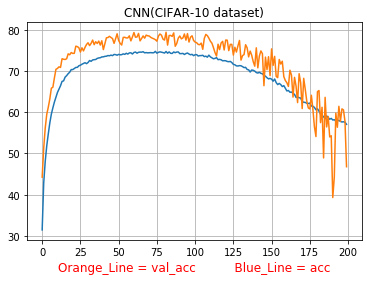

In [5]:
batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    his = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    his = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# acc
acc = his.history["acc"]
val_acc = his.history["val_acc"]

acc_List = []
valacc_List = []

for i in acc:
    acc_List.append(i*100)
    
for i in val_acc:
    valacc_List.append(i*100)
    
plt.grid(True)
plt.plot(acc_List)
plt.plot(valacc_List)
plt.xlabel('Orange_Line = val_acc          Blue_Line = acc', fontsize=12, color='red')
plt.title(r'CNN(CIFAR-10 dataset)')
plt.show()